## Name - Abhishek Raju Chavan
## Roll no - 210950125013

### Q1. A dataset containing the medical records of 299 heart failure patients is provided. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures. The dataset contains 13 features, which report clinical, body, and lifestyle information.

- a) Describe the statistical details (such as mean, median, standard deviation, frequency of
     each category in the case of categorical variables etc.) through appropriate visualization.
- b) Perform the curation of the data, if required. (For example, filling the missing values).
- c) Perform normalization using appropriate method.
- d) Find out the optimal K-Value using any method and visualize the elbow curve.
- e) Visualize the clusters and save the cluster ID of every patient to a csv fille.
- f) Write your analysis of the results. For example, what are the common
     symptoms/disorders of all the patients in a cluster.
- Note: Last column DEATH_EVENT can be removed, it is target variable.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("heart_failure_clinical_records_dataset.csv", delimiter=",")

In [2]:
df.shape

(299, 13)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- **Q1-a) Describe the statistical details (such as mean, median, standard deviation, frequency of each category in the case of categorical variables etc.) through appropriate visualization.**

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


- as per mentioned in question that target attribute can be removed 
- Dropping unnecessary attributes.


In [5]:
df = df.drop(['DEATH_EVENT'], axis=1)

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


Deatil description of heart failure patients by observing the statistical overviw of dataset.

- All the patients are more than 40 years old, having left ventricular systolic dysfunction.

- 299 patients of heart failure comprising of 105 women and 194 men.

- We can consider Age, serum sodium and creatinine_phosphokinase are continuous variables whereas ejection_fraction, serum creatinine and platelets can consider as categorical variables.

- Follow up time is 4–285 days with an average of 130 days.

- The age range of the patients is 40 to 95 and the average age is 60.83.

- The mean average of smoking shows only 32% of patients have smoking problem.



### by observing the statistical overview of dataset the 4 attributes having outliers as follows:
- creatinine_phosphokinase
- ejection_fraction
- platelets
- serum_creatinine

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'anaemia'),
  Text(3, 0, 'creatinine_phosphokinase'),
  Text(4, 0, 'diabetes'),
  Text(5, 0, 'ejection_fraction'),
  Text(6, 0, 'high_blood_pressure'),
  Text(7, 0, 'platelets'),
  Text(8, 0, 'serum_creatinine'),
  Text(9, 0, 'serum_sodium'),
  Text(10, 0, 'sex'),
  Text(11, 0, 'smoking'),
  Text(12, 0, 'time')])

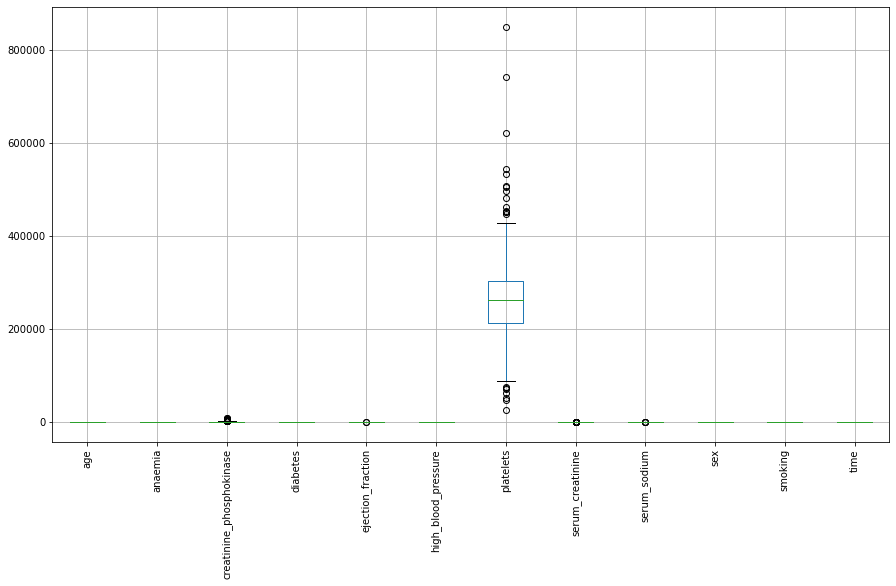

In [7]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)

#### In the above figure I am not able to recognize the outliers in each of the attribute so I will plot the boxplot for each attribute.

<AxesSubplot:xlabel='platelets'>

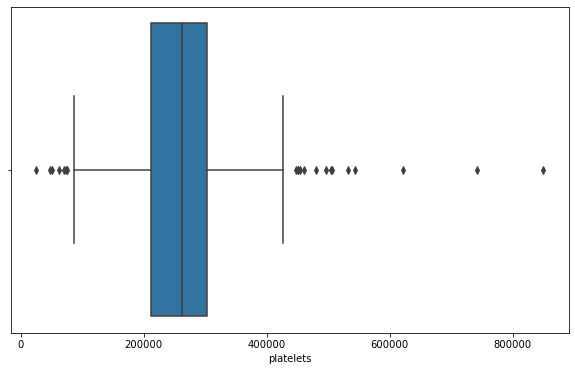

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["platelets"], width=0.9)

<AxesSubplot:xlabel='creatinine_phosphokinase'>

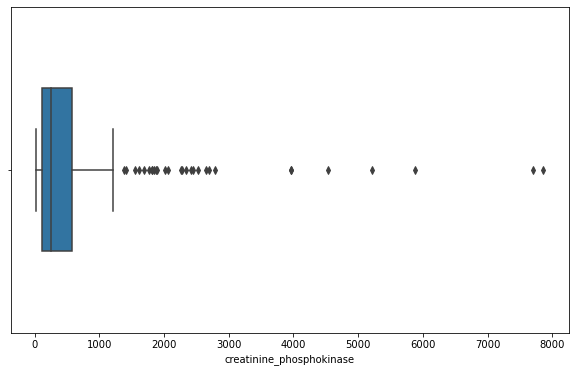

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["creatinine_phosphokinase"], width=0.5)

<AxesSubplot:xlabel='serum_creatinine'>

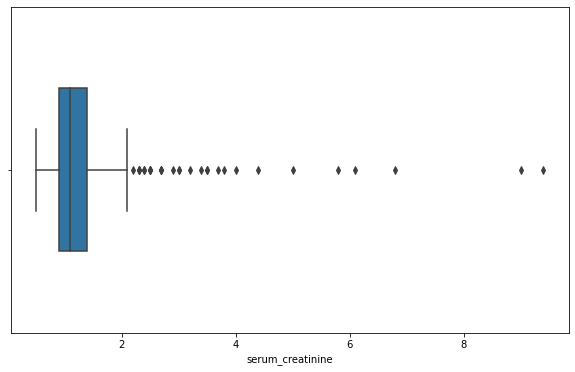

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["serum_creatinine"], width=0.5)

<AxesSubplot:xlabel='ejection_fraction'>

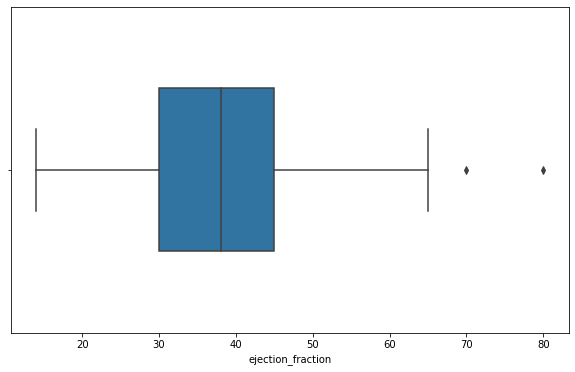

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["ejection_fraction"], width=0.5)

In [12]:
outliers = []
def find_Outliers(df):
    mean = np.mean(df)
    std = np.std(df)
    
    for i in df:
        z_score = (i - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
print("This observations fall farther than three standard deviations from the mean:",find_Outliers(df["platelets"]))

This observations fall farther than three standard deviations from the mean: [621000.0, 850000.0, 742000.0]


In [13]:
outliers = []
def find_Outliers(df):
    mean = np.mean(df)
    std = np.std(df)
    
    for i in df:
        z_score = (i - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
print("This observations fall farther than three standard deviations from the mean:",find_Outliers(df["creatinine_phosphokinase"]))

This observations fall farther than three standard deviations from the mean: [7861, 3964, 7702, 5882, 5209, 4540, 3966]


In [14]:
outliers = []
def find_Outliers(df):
    mean = np.mean(df)
    std = np.std(df)
    
    for i in df:
        z_score = (i - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
print("This observations fall farther than three standard deviations from the mean:",find_Outliers(df["serum_creatinine"]))

This observations fall farther than three standard deviations from the mean: [9.4, 5.8, 6.8, 6.1, 9.0, 5.0]


In [15]:
outliers = []
def find_Outliers(df):
    mean = np.mean(df)
    std = np.std(df)
    
    for i in df:
        z_score = (i - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
print("This observations fall farther than three standard deviations from the mean:",find_Outliers(df["ejection_fraction"]))

This observations fall farther than three standard deviations from the mean: [80]


- for creatinine_phosphokinase values over 3000 can be considered as outliers.
- for ejection_fraction values, values over 60 can be considered as outliers.
- for platelets attribute, values over 600K can be seen as outliers.
- serum_creatinine values, values over 4 can be considered as outliers.

- **Q1-b) Perform the curation of the data, if required. (For example, filling the missing values).**

 **So, let's remove those samples from our data**

In [16]:
#checking null or missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

- null values are not present in dataset.

In [17]:
size = len(df)
df = df[(df['creatinine_phosphokinase'] < 3000) & (df['ejection_fraction'] < 60) & (df['platelets'] < 600000) & (df['serum_creatinine'] < 4)]
print('Number of removed outliers: {}'.format(size - len(df)))

Number of removed outliers: 50


- **Q1-c) Perform normalization using appropriate method.**
**Normalize the data**

In [18]:
# Keep the copy of original dataframe
df_orig = df

In [19]:
def standardization(dataset):
    """ Standardization of numeric fields, where all values will have mean of zero 
    and standard deviation of one. (z-score)
    """
    dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
    print(dtypes)
    for column, dtype in dtypes:
        #if dtype == 'float32':
        dataset[column] -= dataset[column].mean()
        dataset[column] /= dataset[column].std()
    return dataset
df = standardization(df_orig)

[('age', 'float64'), ('anaemia', 'int64'), ('creatinine_phosphokinase', 'int64'), ('diabetes', 'int64'), ('ejection_fraction', 'int64'), ('high_blood_pressure', 'int64'), ('platelets', 'float64'), ('serum_creatinine', 'float64'), ('serum_sodium', 'int64'), ('sex', 'int64'), ('smoking', 'int64'), ('time', 'int64')]


In [20]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.202477,-0.838240,0.189290,-0.866311,-1.716825,1.386241,0.098633,1.057643,-1.459503,0.718478,-0.674024,-1.655910
2,0.368137,-0.838240,-0.604026,-0.866311,-1.716825,-0.718478,-1.092857,0.027377,-1.683558,0.718478,1.477668,-1.618036
3,-0.883373,1.188185,-0.667710,-0.866311,-1.716825,-0.718478,-0.537599,1.057643,0.108878,0.718478,-0.674024,-1.618036
4,0.368137,1.188185,-0.578553,1.149684,-1.716825,-0.718478,0.815841,2.431330,-4.596265,-1.386241,-0.674024,-1.605411
5,2.453986,1.188185,-0.784160,-0.866311,0.569826,1.386241,-0.607006,1.401064,-1.011394,0.718478,1.477668,-1.605411


- **Q1-d) Find out the optimal K-Value using any method and visualize the elbow curve.**

### Finding the optimal number of clusters - K
- Using Inertia 

#### Elbow Method

In [21]:
from sklearn.cluster import KMeans

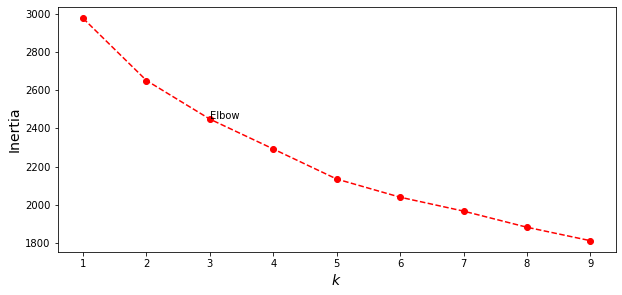

In [22]:
# Try K=1 to 9
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(10, 4.5))
plt.plot(range(1, 10), inertias, "ro--")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', xy=(3, inertias[2]))
plt.show()

- As we can see, there is an elbow at  𝑘=3 , which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So  𝑘=3  is a quite good choice. so, now we need to check the cluster id by taking k=3.

In [23]:
# Let's take k=3 as per elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(df)

In [24]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1,
       2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[-0.14507446,  0.16146292,  0.01114547,  0.1820063 ,  0.19024207,
         0.29178675,  0.29391029, -0.37305264,  0.26720966, -1.35817772,
        -0.64533485,  0.13275267],
       [ 0.63408268, -0.07833067, -0.13777105, -0.07881306, -0.32696995,
        -0.02786745, -0.33096415,  1.0648867 , -0.75933307,  0.3567298 ,
        -0.23696159, -0.57038599],
       [-0.27000643, -0.06451414,  0.07255852, -0.07824033,  0.06052656,
        -0.18273172, -0.00783242, -0.36521638,  0.25960538,  0.71847838,
         0.5778696 ,  0.24134775]])

- **Q1-e) Visualize the clusters and save the cluster ID of every patient to a csv fille.**

In [26]:
from sklearn.decomposition import PCA

In [27]:
plt.figure(figsize=(10,8))
pca = PCA(n_components=2)
pcs = pca.fit_transform(df)


<Figure size 720x576 with 0 Axes>

In [28]:
a = pd.DataFrame(pcs)
a.head()

,0,1
0,1.954125,2.150881
1,3.088272,0.303779
2,1.559667,1.025304
3,1.877884,3.879226
4,2.719319,2.253371


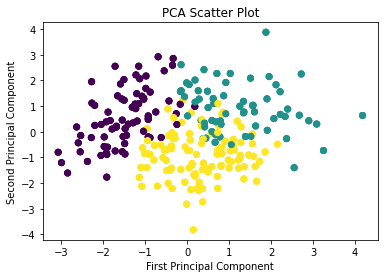

In [29]:
plt.scatter(pcs[:, 0], pcs[:, 1], c = kmeans.labels_)
plt.scatter(pcs[:, 0], pcs[:, 1], c = kmeans.labels_ )
plt.scatter(pcs[:, 0], pcs[:, 1], c = kmeans.labels_ )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [30]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.202477,-0.838240,0.189290,-0.866311,-1.716825,1.386241,0.098633,1.057643,-1.459503,0.718478,-0.674024,-1.655910
2,0.368137,-0.838240,-0.604026,-0.866311,-1.716825,-0.718478,-1.092857,0.027377,-1.683558,0.718478,1.477668,-1.618036
3,-0.883373,1.188185,-0.667710,-0.866311,-1.716825,-0.718478,-0.537599,1.057643,0.108878,0.718478,-0.674024,-1.618036
4,0.368137,1.188185,-0.578553,1.149684,-1.716825,-0.718478,0.815841,2.431330,-4.596265,-1.386241,-0.674024,-1.605411
5,2.453986,1.188185,-0.784160,-0.866311,0.569826,1.386241,-0.607006,1.401064,-1.011394,0.718478,1.477668,-1.605411


In [31]:
df["cluster_id"]=kmeans.labels_

In [32]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster_id
0,1.202477,-0.838240,0.189290,-0.866311,-1.716825,1.386241,0.098633,1.057643,-1.459503,0.718478,-0.674024,-1.655910,1
2,0.368137,-0.838240,-0.604026,-0.866311,-1.716825,-0.718478,-1.092857,0.027377,-1.683558,0.718478,1.477668,-1.618036,1
3,-0.883373,1.188185,-0.667710,-0.866311,-1.716825,-0.718478,-0.537599,1.057643,0.108878,0.718478,-0.674024,-1.618036,1
4,0.368137,1.188185,-0.578553,1.149684,-1.716825,-0.718478,0.815841,2.431330,-4.596265,-1.386241,-0.674024,-1.605411,1
5,2.453986,1.188185,-0.784160,-0.866311,0.569826,1.386241,-0.607006,1.401064,-1.011394,0.718478,1.477668,-1.605411,1


In [33]:
df.to_csv("cluster_output.csv", index=False)

In [34]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster_id
0,1.202477,-0.838240,0.189290,-0.866311,-1.716825,1.386241,0.098633,1.057643,-1.459503,0.718478,-0.674024,-1.655910,1
2,0.368137,-0.838240,-0.604026,-0.866311,-1.716825,-0.718478,-1.092857,0.027377,-1.683558,0.718478,1.477668,-1.618036,1
3,-0.883373,1.188185,-0.667710,-0.866311,-1.716825,-0.718478,-0.537599,1.057643,0.108878,0.718478,-0.674024,-1.618036,1
4,0.368137,1.188185,-0.578553,1.149684,-1.716825,-0.718478,0.815841,2.431330,-4.596265,-1.386241,-0.674024,-1.605411,1
5,2.453986,1.188185,-0.784160,-0.866311,0.569826,1.386241,-0.607006,1.401064,-1.011394,0.718478,1.477668,-1.605411,1


- **f) Write your analysis of the results. For example, what are the common symptoms/disorders of all the patients in a cluster.**

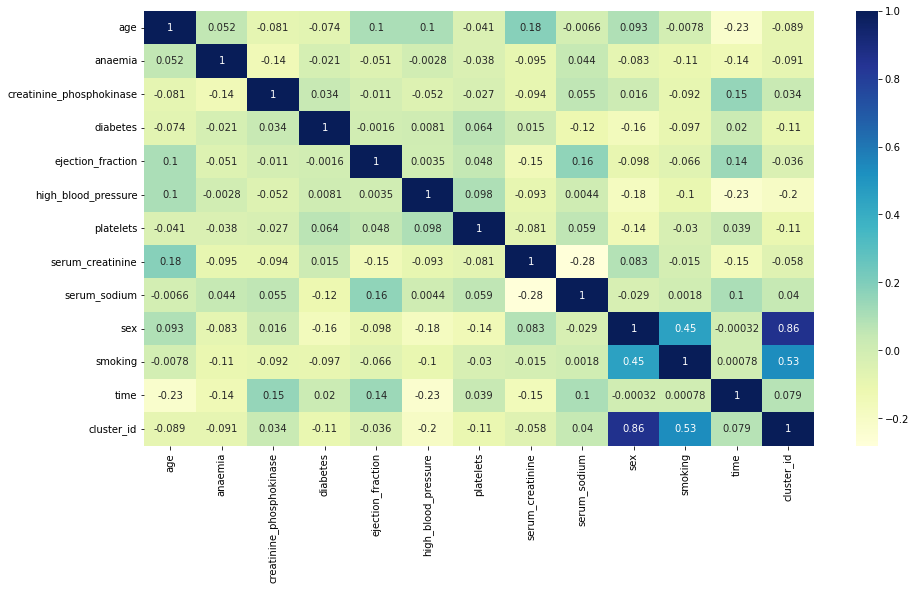

In [35]:
plt.figure(figsize=(15,8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Conclusion:**

**1)As per my observation, if we look at the heatmap there is a very strong positive correalation between all clusters and gender as well as smoking, 
here I can say that the chances of death event is more in heart patients having more smoking habits.**


**2) time has a positive correlation with the cluster_id, so the no longer the patient is under the medical care, the higher the possibility of the his/her death.**

**3) serum_sodium has a positive correlation with the cluster_id, so the lower the value of serum_sodium, the higher the possibility of the patient death.**

**4) creatinine_phosphokinase has a positive correlation with the cluster_id, so the lower the value of creatinine_phosphokinase, the higher the possibility of the patient death.**

**5) smoking and sex has a positive co-linearity, meaning male patient are more likely to smoke, because its a general tendancy among male to smoke, also In the dataset there are more male patients than female patients**

**6) Also, serum_sodium and ejection_fraction has a strong positive co-linearity.**